# Impactful Compensation Strategy: Data-Guided Salary Adjustments

**Problem Statement**:  
Determining fair and appropriate salary increases is a complex task.  
The merit matrix is a common tool used in human resources and compensation management to determine salary increases based on an employee's performance and position in the salary range.  
While being a uselful tool that can help companies during a challenging merit cycle it needs to be implemented correctly.

**Questions to be Answered**:

1. How can we implement a merit increase matrix in Python?

2. How can we apply this matrix to an existing employee data to calculate proposed salary increases?

3. How do these proposed increases affect the overall salary distribution?

4. Are there any patterns or insights that can be gleaned from analyzing these proposed increases?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Load the dataset
df = pd.read_csv('DKP EmployeeData.csv')


**Data Description**: The data used in this notebook is fictional, designed to mimic real-world data from various companies. 
This data is used to demonstrate the process of calculating and analyzing merit increases for employees. 

**Data Source**: The data is not sourced from any specific company or dataset. Instead, it is generated to reflect typical data that might be used in a merit increase analysis. This includes information such as employee salaries, performance grades, and compa-ratios (the ratio of an employee's pay to the median pay for their role). 

**Features**: Key features in the data include:

- `Salary`: The current salary of the employee. Continuous variable. Key date used to calculate the effects of the merit increases.
- `PerformanceGrade`: The performance grade of the employee, typically based on their most recent performance review. Continuous variable (from 0 to 4). It is useful to determine the salary increase percentage from the merit increase matrix.
- `MidpointWage`: This represents the middle point of a wage range for a particular role or job grade. Continuous variable. 

**Data Cleaning and Preprocessing**: The data used in this notebook is already clean and does not require any additional preprocessing. In a real-world scenario, data cleaning might involve handling missing values, correcting data entry errors, or transforming data into a format suitable for analysis. In this case, the data is already in a suitable format, so no additional cleaning or preprocessing steps are necessary.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EmployeeID        2895 non-null   int64  
 1   DateOfHire        2895 non-null   object 
 2   Department        2895 non-null   object 
 3   JobProfile        2895 non-null   object 
 4   JobType           2895 non-null   object 
 5   JobTitle          2895 non-null   object 
 6   Salary            2895 non-null   int64  
 7   MidpointWage      2895 non-null   float64
 8   PerformanceGrade  2895 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 203.7+ KB


---------------

## Compa Ratio Calculation 

This section of the code calculates the `CompaRatio` for each employee. The `CompaRatio` is a key HR metric that compares an employee's salary to the midpoint wage for their job type.

Before the calculation, the code first checks if the `MidpointWage` column contains any missing or zero values. This is important because division by zero or by a missing value would lead to errors. If such values are found, a `ValueError` is raised.

The `CompaRatio` is then calculated by dividing the `Salary` by the `MidpointWage` for each employee. The result is rounded to four decimal places for readability and precision.

The relevance of this calculation is multifold:

1. **Salary Fairness Analysis**: The `CompaRatio` can be used to analyze salary fairness within the organization.  
A `CompaRatio` of 1.0 indicates that an employee is paid exactly at the midpoint for their job type, while a `CompaRatio` less than 1.0 indicates they are paid below the midpoint, and a `CompaRatio` greater than 1.0 indicates they are paid above the midpoint.

2. **Merit Increase Impact Analysis**: In the context of the merit increase matrix, the `CompaRatio` is a key factor in determining the proposed salary increases. Understanding the distribution of `CompaRatio` values can help in analyzing the impact of these increases.

3. **Inform HR Decisions**: This analysis can inform HR decisions related to salary adjustments, promotions, and hiring. For example, if certain job types or departments have lower average `CompaRatio` values, it might indicate a need for salary adjustments in those areas.

In [3]:

# Check for missing or zero values in the MidpointWage column to avoid division by zero
if df['MidpointWage'].isnull().any() or (df['MidpointWage'] == 0).any():
    raise ValueError("MidpointWage column contains zeros or missing values, which will lead to division errors.")

df['CompaRatio'] = (df['Salary'] / df['MidpointWage']).round(4)

In [4]:
# Display the first few rows of the dataframe to check the new column
df.head()


,EmployeeID,DateOfHire,Department,JobProfile,JobType,JobTitle,Salary,MidpointWage,PerformanceGrade,CompaRatio
0,2008161,01/08/2020,Customer Service,Individual Contributor,1. Entry Level,Customer Service Associate,1566,1800.0,2.85,0.87
1,2212081,11/12/2022,Customer Service,Individual Contributor,1. Entry Level,Customer Service Associate,1566,1800.0,3.28,0.87
2,1707102,14/07/2017,Customer Service,Individual Contributor,1. Entry Level,Customer Service Associate,1566,1800.0,2.85,0.87
3,2302202,08/02/2023,Customer Service,Individual Contributor,1. Entry Level,Customer Service Associate,1566,1800.0,3.69,0.87
4,1909081,02/09/2019,Customer Service,Individual Contributor,1. Entry Level,Customer Service Associate,1566,1800.0,3.28,0.87


The selected code is used to analyze the distribution of the 'CompaRatio' (the ratio of an employee's salary to the median salary for their position) across different performance grades. 

- Calculate quartiles and statistics for 'CompaRatio' and 'PerformanceGrade'
- Bin the 'PerformanceGrade' and 'CompaRatio' data
- Create and normalize a cross-tabulation
- Pivot the DataFrame
- Calculate 'Total Company' row
- Plot the data as a 100% stacked horizontal bar plot

This analysis can help the company understand how salaries are currently distributed across different performance grades, which can inform decisions about how to allocate salary increases.  
For example, if the analysis shows that high-performing employees are mostly in the lower 'CompaRatio' ranges, the company might decide to give larger increases to these employees to bring their salaries closer to the median for their positions.


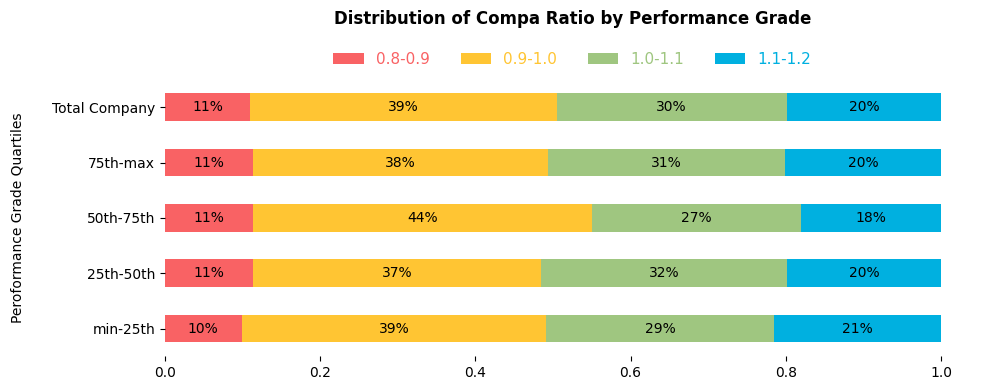

In [5]:
# Calculate the quartiles for 'CompaRatio' and 'PerformanceGrade'
compa_ratio_quartiles = df['CompaRatio'].quantile([0.25, 0.5, 0.75]).round(4).values
compa_ratio_stats = df['CompaRatio'].agg(['min', 'max']).round(4).values
performance_grade_quartiles = df['PerformanceGrade'].quantile([0.25, 0.5, 0.75]).round(4).values
performance_grade_stats = df['PerformanceGrade'].agg(['min', 'max']).round(4).values

# Bin the PerformanceGrade data
PerformanceGrade_bins = np.concatenate([performance_grade_stats[:1], performance_grade_quartiles, performance_grade_stats[1:]])
df['PerformanceGrade_bins'] = pd.cut(df['PerformanceGrade'], bins=PerformanceGrade_bins.round(4), include_lowest=True, 
                                     labels=['min-25th', '25th-50th', '50th-75th', '75th-max'])

# Define the bins for the Compa Ratio
bins = [0, 0.80, 0.9, 1.0, 1.1, 1.20, float('inf')]

# Create a new column for the binned Compa Ratio
df['CompaRatio_bins'] = pd.cut(df['CompaRatio'], bins, 
                             labels=['<0.8', '0.8-0.9', '0.9-1.0', '1.0-1.1', '1.1-1.2', '>1.2'])

# Create a cross-tabulation of PerformanceGrade_bins and CompaRatio_bins
ct = pd.crosstab(df['PerformanceGrade_bins'], df['CompaRatio_bins'])

# Normalize the cross-tabulation to get percentages
ct_normalized = ct.div(ct.sum(axis=1), axis=0)

# Reset index and assign column names
df_viz = ct_normalized.stack().reset_index()
df_viz.columns = ['PerformanceGrade_bins', 'CompaRatio_bins', 'Value']

# Pivot the DataFrame using pivot_table
df_pivot = df_viz.pivot_table(index='PerformanceGrade_bins', columns='CompaRatio_bins', values='Value', aggfunc='first', observed=False)

# Sort the index of df_pivot
df_pivot.sort_index(ascending=True, inplace=True)

# Create the 100% stacked horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 4))

# Create a new colormap from the list of colors
cmap = mcolors.LinearSegmentedColormap.from_list("", ["#F96264","#FFC533","#9FC680", "#00B0E0"])

# Calculate the sum across all categories
total_company = df_pivot.sum()

# Calculate the sum across all categories
total_company = df_pivot.sum()

# Add a new row for 'Total Company'
df_pivot.loc['Total Company', :] = total_company

# Normalize the 'Total Company' row
df_pivot.loc['Total Company', :] = df_pivot.loc['Total Company', :] / df_pivot.loc['Total Company', :].sum()

df_pivot.plot(kind='barh', stacked=True, colormap=cmap, ax=ax)

# Set the title
ax.set_title('Distribution of Compa Ratio by Performance Grade', pad=40, fontweight='bold')

# Remove the lines of the graph area
for spine in ax.spines.values():
    spine.set_visible(False)

# Add data labels to each patch
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if width > 0.02: 
        ax.text(x+width/2, 
                y+height/2, 
                f'{width:.0%}', 
                horizontalalignment='center', 
                verticalalignment='center')
        
# Create the legend without handles
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=7, prop={'size': 11}, frameon=False)

# Set the color of the legend text to match the color of the corresponding patch
for text, handle in zip(legend.get_texts(), legend.legend_handles):
    text.set_color(handle.get_facecolor())

# Set the y-axis label
ax.set_ylabel('Peroformance Grade Quartiles', labelpad=20)

# Show the plot
plt.tight_layout()
plt.show()

# Key Findings:

- The Compa Ratios are mostly in the '0.9-1.0' range, regardless of performance grades.
- It also shows relatively uniform distributions suggetting a potential misalignment between compensation and performance.
- High-performing employees may not be rewarded adequately relative to their contributions.
- This could result in talent attrition and hinder organizational performance in the long term.
- There is a need for a more nuanced approach to compensation to properly recognize and incentivize higher performers.



--------------

## Creation of Merit Increase Matrix

This section of the code creates a merit increase matrix based on the quartiles of `PerformanceGrade` and `CompaRatio`.

The `merit_matrix` is a nested dictionary where the keys of the outer dictionary represent the range of `PerformanceGrade` and the keys of the inner dictionaries represent the range of `CompaRatio`.  
The values in the inner dictionaries represent the proposed merit increase as a percentage of the current salary.

The merit increase matrix is the key output of this project. It provides a proposed merit increase for each combination of `PerformanceGrade` and `CompaRatio`, which can be used to guide salary adjustments in the company. This approach ensures that salary adjustments are based on quantifiable metrics (`PerformanceGrade` and `CompaRatio`), promoting fairness and transparency in the process.

By basing the merit increase matrix on the quartiles of `PerformanceGrade` and `CompaRatio`, the matrix is customized to the specific distribution of these features in the company. This ensures that the proposed increases are appropriate and realistic.


In [6]:
# Define the merit matrix based on the quartiles
merit_matrix = {
    f'{performance_grade_stats[0]}-{performance_grade_quartiles[0]}': 
    {
    f'{compa_ratio_stats[0]}-{(compa_ratio_quartiles[0] - 0.0001).round(4)}': 0.00, 
    f'{compa_ratio_quartiles[0].round(4)}-{(compa_ratio_quartiles[1] - 0.0001).round(4)}': 0.00, 
    f'{compa_ratio_quartiles[1].round(4)}-{(compa_ratio_quartiles[2] - 0.0001).round(4)}': 0.00, 
    f'{compa_ratio_quartiles[2].round(4)}-{compa_ratio_stats[1]}': 0.00
    },
    
    f'{performance_grade_quartiles[0]}-{performance_grade_quartiles[1]}': 
    {
    f'{compa_ratio_stats[0]}-{(compa_ratio_quartiles[0] - 0.0001).round(4)}': 0.05, 
    f'{compa_ratio_quartiles[0].round(4)}-{(compa_ratio_quartiles[1] - 0.0001).round(4)}': 0.03, 
    f'{compa_ratio_quartiles[1].round(4)}-{(compa_ratio_quartiles[2] - 0.0001).round(4)}': 0.00, 
    f'{compa_ratio_quartiles[2].round(4)}-{compa_ratio_stats[1]}': 0.00
    },
    
    f'{performance_grade_quartiles[1]}-{performance_grade_quartiles[2]}': 
    {
    f'{compa_ratio_stats[0]}-{(compa_ratio_quartiles[0] - 0.0001).round(4)}': 0.07, 
    f'{compa_ratio_quartiles[0].round(4)}-{(compa_ratio_quartiles[1] - 0.0001).round(4)}': 0.05, 
    f'{compa_ratio_quartiles[1].round(4)}-{(compa_ratio_quartiles[2] - 0.0001).round(4)}': 0.03, 
    f'{compa_ratio_quartiles[2].round(4)}-{compa_ratio_stats[1]}': 0.00
    },
    
    f'{performance_grade_quartiles[2]}-{performance_grade_stats[1]}':
    {
    f'{compa_ratio_stats[0]}-{(compa_ratio_quartiles[0] - 0.0001).round(4)}': 0.09, 
    f'{compa_ratio_quartiles[0].round(4)}-{(compa_ratio_quartiles[1] - 0.0001).round(4)}': 0.07, 
    f'{compa_ratio_quartiles[1].round(4)}-{(compa_ratio_quartiles[2] - 0.0001).round(4)}': 0.05, 
    f'{compa_ratio_quartiles[2].round(4)}-{compa_ratio_stats[1]}': 0.03
    },
}

# Convert the nested dictionary to a DataFrame
df_matrix = pd.DataFrame(merit_matrix)

# Format the merit increase values as percentages
# Format the merit increase values as percentages
df_matrix = df_matrix.apply(lambda x: x.map('{:.0%}'.format))

# Print the DataFrame
df_matrix.T.sort_index(ascending=False)


,0.8695-0.9399,0.94-0.9999,1.0-1.0897,1.0898-1.1702
3.17-4.0,9%,7%,5%,3%
2.95-3.17,7%,5%,3%,0%
2.74-2.95,5%,3%,0%,0%
1.78-2.74,0%,0%,0%,0%


# Merit Matrix Approach 

- **Performance Grade Variability**: The data showed variability in performance grades across the company.  
The matrix accounts for this variability by considering Performance Grade ranges for determining merit increases.

- **Compa Ratio Disparities**: There were relatively uniform distributions in Compa Ratio indicating potential recognition discrepancies within the organization.  
The matrix addresses these disparities by allocating higher merit increases to employees with lower Compa Ratios, reflecting efforts to align salaries with market standards.

- **Fairness and Motivation**: The matrix's design, which rewards both performance and addresses salary competitiveness, supports fairness and motivation among employees.  
It incentivizes high performance while also rectifying salary disparities, which can enhance employee satisfaction and retention.

----------------------------------------------------------------------------------------------------------------------------

## Function to Calculate New Salary and Merit Increase

This function, `calculate_new_salary`, is used to calculate the new salary and merit increase for each employee in the DataFrame. It takes a row of the DataFrame as input, which represents an employee.

The function first determines the performance grade range and compa ratio range for the employee. These ranges are used to look up the salary increase percentage in the `df_matrix` DataFrame.

The salary increase percentage is then converted to a float and used to calculate the new salary. The new salary is calculated by multiplying the current salary by one plus the increase percentage.

The merit increase is calculated by dividing the new salary by the current salary and subtracting one. This gives the percentage increase in salary.

The function returns a pandas Series with the results stored in the `NewSalary` and `MeritIncrease` columns of the DataFrame.

In [7]:
def calculate_new_salary(row):
    # Set the tolerance value
    tolerance = 0.01

    # Determine the performance grade range
    grade_range = next((g for g in df_matrix.columns if float(g.split('-')[0]) - tolerance <= row['PerformanceGrade'] <= float(g.split('-')[1])), None)

    # Determine the compa ratio range
    ratio_range = next((r for r in df_matrix.index if float(r.split('-')[0]) - tolerance <= row['CompaRatio'] <= float(r.split('-')[1])), None)

    # Get the salary increase percentage from the matrix
    increase = df_matrix.loc[ratio_range, grade_range] if grade_range and ratio_range else 0
    increase = increase.strip('%')  # Remove the '%' character
    increase = float(increase) / 100  # Convert to a float and divide by 100

    # Calculate the new salary
    new_salary = round(float(row['Salary'] * (1 + increase)), 0)

    # Calculate the merit increase
    merit_increase = round(new_salary / row['Salary'] - 1, 2)

    return pd.Series([new_salary, merit_increase])

# Apply the function to the DataFrame
df[['NewSalary', 'MeritIncrease']] = df.apply(calculate_new_salary, axis=1)

## Calculation of New CompaRatio

This line of code calculates the new CompaRatio for each employee based on their proposed new salary and midpoint wage.

The `NewCompaRatio` is calculated by dividing the `NewSalary` by the `MidpointWage` for each employee and provides a crucial metric for understanding the impact of the proposed salary adjustments on salary distribution within the organization.

In [8]:
df['NewCompaRatio'] = (df['NewSalary'] / df['MidpointWage']).round(2)


In [9]:
# Displaying the first few rows of the dataframe to check the new columns
df.head()

,EmployeeID,DateOfHire,Department,JobProfile,JobType,JobTitle,Salary,MidpointWage,PerformanceGrade,CompaRatio,PerformanceGrade_bins,CompaRatio_bins,NewSalary,MeritIncrease,NewCompaRatio
0,2008161,01/08/2020,Customer Service,Individual Contributor,1. Entry Level,Customer Service Associate,1566,1800.0,2.85,0.87,25th-50th,0.8-0.9,1644.0,0.05,0.91
1,2212081,11/12/2022,Customer Service,Individual Contributor,1. Entry Level,Customer Service Associate,1566,1800.0,3.28,0.87,75th-max,0.8-0.9,1707.0,0.09,0.95
2,1707102,14/07/2017,Customer Service,Individual Contributor,1. Entry Level,Customer Service Associate,1566,1800.0,2.85,0.87,25th-50th,0.8-0.9,1644.0,0.05,0.91
3,2302202,08/02/2023,Customer Service,Individual Contributor,1. Entry Level,Customer Service Associate,1566,1800.0,3.69,0.87,75th-max,0.8-0.9,1707.0,0.09,0.95
4,1909081,02/09/2019,Customer Service,Individual Contributor,1. Entry Level,Customer Service Associate,1566,1800.0,3.28,0.87,75th-max,0.8-0.9,1707.0,0.09,0.95


## Scatter Plot of Performance Grade vs Compa Ratio

This section of the code creates a scatter plot of `PerformanceGrade` against `CompaRatio`, which is crucial for understanding the impact of the merit increase matrix and informing related HR decisions.  
The `x` and `y` parameters are set to `CompaRatio` and `PerformanceGrade`, respectively, and the `hue` parameter is set to `MeritIncrease` to color the points.

The visual helps to understand how the merit increase varies with performance and compa ratio and identify patterns in the distribution of merit increases across different scenarios.

In [10]:
# Define the base color
base_color = "#007495"

# Create a light gradient color palette
light_palette = sns.light_palette(base_color, n_colors=10)

# Create a dark gradient color palette
dark_palette = sns.dark_palette(base_color, n_colors=10)

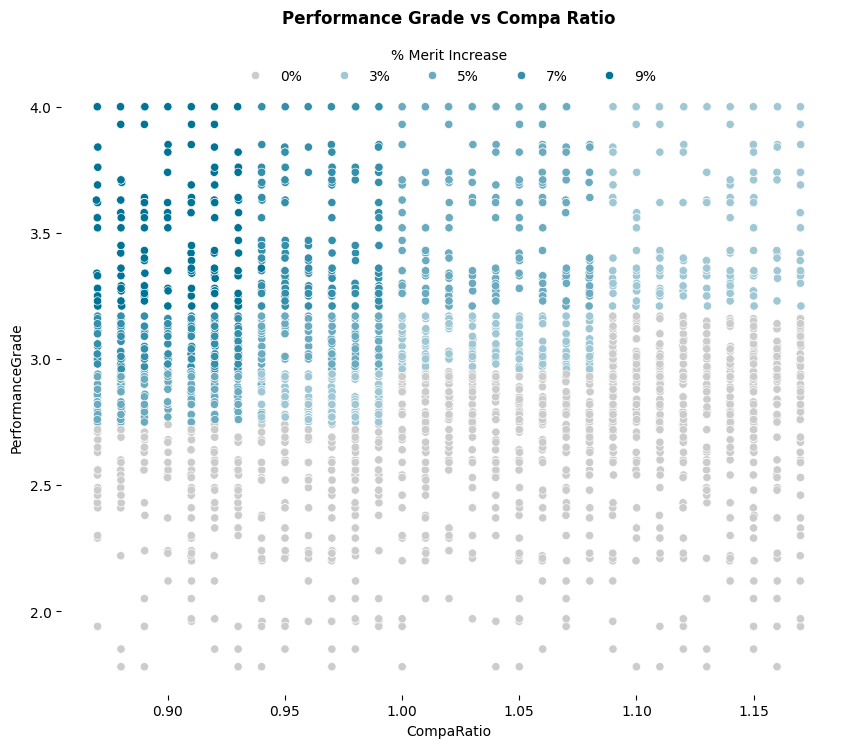

In [11]:
# Create a custom color map
cmap = sns.light_palette(base_color, as_cmap=True)
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (.8, .8, .8, 1.0)  # set the color for zero merit increase to light grey
cmap = mcolors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

# Create a scatter plot for Performance Grade and Compa Ratio, coloring by the % increase
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='CompaRatio', y='PerformanceGrade', hue='MeritIncrease', palette=cmap, data=df)

# Add a title to the plot
plt.title('Performance Grade vs Compa Ratio', pad=40, fontweight='bold')

# Move the legend to the upper left
legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.07), ncol=5, title='% Merit Increase', title_fontsize='10', frameon=False)

# Format the legend labels to display as percentages with two decimal places
for t in legend.texts:
    t.set_text(f'{float(t.get_text()) * 100:.0f}%')

# Remove the lines of the graph area
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)

# Show the plot
plt.show()

----

## Comparing Before and After Scenarios

This section of the code compares the distribution of the 'CompaRatio' (the ratio of an employee's salary to the median salary for their position) across different performance grades, both before and after a proposed merit increase. 
It provides a visual analysis of the proposed salary adjustments, which is crucial for understanding how the merit increases would affect the compa ratios. 

- Define bins and create new columns for binned 'CompaRatio' and 'NewCompaRatio'.
- Create cross-tabulations of 'PerformanceGrade_bins' and 'CompaRatio' bins.
- Normalize the cross-tabulations.
- Combine the normalized cross-tabulations into a single DataFrame.
- Create a 100% stacked horizontal bar plot.

This analysis can help the company understand how the proposed merit increase would affect the distribution of 'CompaRatio' across different performance grades.   
For example, if the analysis shows that the proposed increase would result in a higher proportion of employees in the higher 'CompaRatio' bins, this might suggest that the proposed increase is effective in bringing salaries closer to the median for their positions.

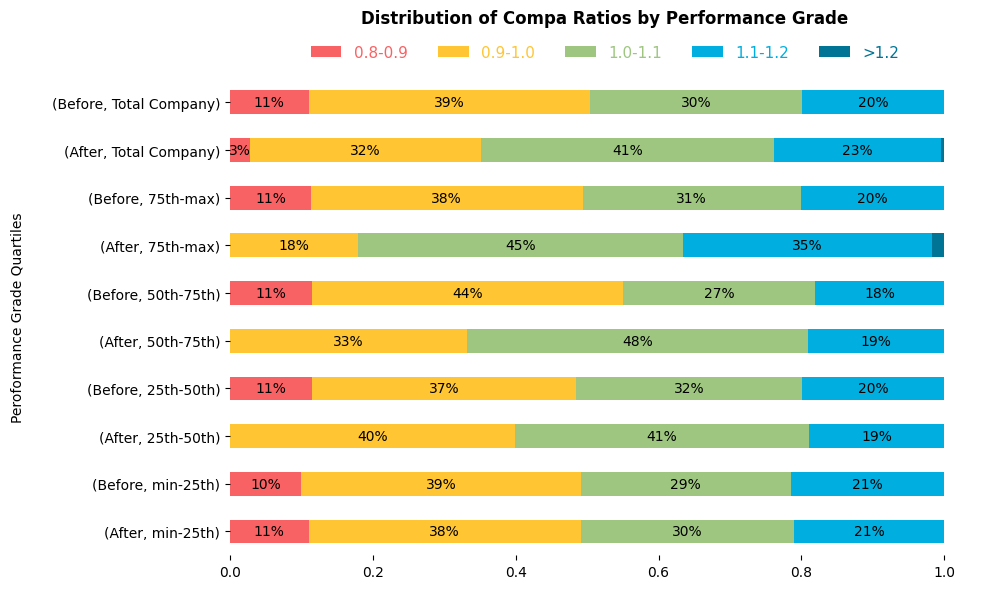

In [12]:
# Create a new colormap from the list of colors
cmap = mcolors.LinearSegmentedColormap.from_list("", ["#F96264","#FFC533","#9FC680", "#00B0E0", "#007495"])

# Define the bins for the Compa Ratio
bins = [0, 0.80, 0.9, 1.0, 1.1, 1.20, float('inf')]

# Create a new column for the binned Compa Ratio
df['CompaRatioBin'] = pd.cut(df['CompaRatio'], bins, 
                             labels=['<0.8', '0.8-0.9', '0.9-1.0', '1.0-1.1', '1.1-1.2', '>1.2'])

# Create a new column for the binned NewCompaRatio
df['NewCompaRatioBin'] = pd.cut(df['NewCompaRatio'], bins, 
                                labels=['<0.8', '0.8-0.9', '0.9-1.0', '1.0-1.1', '1.1-1.2', '>1.2'])

# Create a new DataFrame that contains both the current and new Compa Ratio bins
df_combined = pd.concat([df['CompaRatioBin'], df['NewCompaRatioBin']], axis=1)
df_combined.columns = ['CurrentCompaRatio', 'NewCompaRatio']

# Create a cross-tabulation of Department and CurrentCompaRatio
ct_current = pd.crosstab(df['PerformanceGrade_bins'], df_combined['CurrentCompaRatio'])

# Create a cross-tabulation of Department and NewCompaRatio
ct_new = pd.crosstab(df['PerformanceGrade_bins'], df_combined['NewCompaRatio'])

# Add a row for 'Total Company' that sums up the data across all categories
ct_current.loc['Total Company'] = ct_current.sum()
ct_new.loc['Total Company'] = ct_new.sum()

# Normalize the cross-tabulations to get percentages
ct_current_normalized = ct_current.div(ct_current.sum(axis=1), axis=0)
ct_new_normalized = ct_new.div(ct_new.sum(axis=1), axis=0)

# Combine the normalized cross-tabulations into a single DataFrame
ct_all = pd.concat([ct_new_normalized, ct_current_normalized ], keys=['After', 'Before'], axis=0)

# Reset index and assign column names
df_viz = ct_all.stack().reset_index()
df_viz.columns = ['RatioType', 'PerformanceGrade_bins', 'Bin', 'Value']

# Add 'Missing' to the categories of the 'Bin' column
df_viz['Bin'] = df_viz['Bin'].cat.add_categories('Missing')

# Fill missing values in the 'Bin' column with 'Missing'
df_viz = df_viz.fillna({'Bin': 'Missing'})

# Convert 'Bin' column to string
df_viz['Bin'] = df_viz['Bin'].astype(str)

# Now you can create your pivot table
df_pivot = df_viz.pivot_table(index=['RatioType', 'PerformanceGrade_bins'], columns='Bin', values='Value', aggfunc='first')

# Sort the index of df_pivot
new_index = pd.MultiIndex.from_tuples([
    ('After', 'min-25th'),
    ('Before', 'min-25th'),
    ('After', '25th-50th'),
    ('Before', '25th-50th'),
    ('After', '50th-75th'),
    ('Before', '50th-75th'),
    ('After', '75th-max'),
    ('Before', '75th-max'),
    ('After', 'Total Company'),
    ('Before', 'Total Company')
], names=['RatioType', 'PerformanceGrade_bins'])

df_pivot = df_pivot.reindex(new_index)

# Create the 100% stacked horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))

df_pivot.plot(kind='barh', stacked=True, colormap=cmap, ax=ax)

# Set the title
ax.set_title('Distribution of Compa Ratios by Performance Grade', pad=40, fontweight='bold')

# Remove the lines of the graph area
for spine in ax.spines.values():
    spine.set_visible(False)

# Add data labels to each patch
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if width > 0.02: 
        ax.text(x+width/2, 
                y+height/2, 
                f'{width:.0%}', 
                horizontalalignment='center', 
                verticalalignment='center')


# Create the legend without handles
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10), ncol=7, prop={'size': 11}, frameon=False)

# Set the color of the legend text to match the color of the corresponding patch
for text, handle in zip(legend.get_texts(), legend.legend_handles):
    text.set_color(handle.get_facecolor())
    
# Set the y-axis label
ax.set_ylabel('Peroformance Grade Quartiles', labelpad=20)

# Show the plot
plt.tight_layout()
plt.show()

# Key Findings:

- The "After" scenario has shown an improvement in the overall Compa Ratio of the Total Company, with a shift towards higher ranges. 
- This improvement is especially beneficial for higher performers in the 75th-max category, with 82% of them targeted at the market with a Compa Ratio value of 1.0 or higher. 
- As employee performance decreases, the distribution of salaries close to or above the market midpoint also decreases accordingly. 
- The distribution of salaries in the 0.8-0.9 range, which previously appeared in every performance range, dropped by 8 percentage points in the Total Company and remains present only among those employees with the lowest performance grade.

# Conclusion

In this project, we set out to implement a merit increase matrix in Python and apply it to an existing employee data to calculate proposed salary increases.  
Our goal was to understand how these proposed increases would affect the overall salary distribution and glean any insights from analyzing these proposed increases.

Our analysis revealed that the proposed merit increases would shift Compa Ratios distributions and make possibile for employees with the same performance to converge, over time, on a target point (typically the midpoint).

They also demonstrate the power of Python and data analysis in to simplifying planning and administration of a merit cycle and the potential to improve employee satisfaction while attracting and retaining highly motivated employees.

As is the case with any reward system, merit pay must be compatible with the organization’s culture and philosophy.  
To ensure effectiveness, a company must have a sound system of measuring individual employee performance and a strong communication strategy. 

# Limitations and Assumptions

While the analysis provides valuable insights into the effects of the proposed merit increases, it's important to acknowledge its limitations and the assumptions made during the process:


- Assumptions have been made about the merit increase matrix, which may not fully capture all factors influencing salary increases.
- Other factors such as tenure, skills, market demand, and department budgets can also influence salary increases.
- Data constraints and potential biases in the data may also impact the results, specially if performance grades are not assigned objectively
- The analysis provides a static snapshot and does not account for future changes in the market or individual employee performance.
- Future research could address the limitations by incorporating additional variables, addressing potential biases, using dynamic modeling, exploring employee satisfaction and retention, and benchmarking against industry standards.

These limitations do not invalidate our findings, but they do suggest areas where further research could enhance our understanding of salary distribution and the impact of merit increases. As with any data analysis, it's important to interpret the results in the context of the data and methods used.